In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../DAPack')
from model_pendulum import ModelPendulum
from HyPar_DAFiltering import DAFilter

import _utility
from _visualization import DA_Visualization

plt.close('all')
os.system('clear')
np.random.seed(2345)
divider = "------------------------------------------------------------"

Clean-up temporary model directory

In [3]:
_utility.clean_model_dir('temp_model')

old files exist, cleaning-up || 


Prepare model configuration file

In [4]:
Model_Configs = {'ndims': 1 , 'nvars': 2 , 'size': np.array([1]) , 'n_iter':100 , 'model': 'Pendulum' }
_utility.create_original_model_configurations(Model_Configs)

Read filter and model configs from the da_solver.ini

In [5]:
daFilterConfigs = _utility.read_filter_configurations()

Create an instance for the DensitySineWave model and build the experiment.
Then, prepare the model: overwrite the configuration file, setup the grids, and create necessary matrices.

In [6]:
Pendulum_Model = ModelPendulum()
_utility.prepare_model_for_filtering(Pendulum_Model)

Initializing the model
Obtaining model grids


Create an instance for the filter and set up the parameters. Also, the uncertainty parameters are added to the model based on the filter configurations.

In [7]:
Filter = DAFilter(daFilterConfigs)
Filter.set_DA_filter(Pendulum_Model)

Creating background error covariance matrix...
Creating Decorr... Done...
Generating forecast initial condition...
Generating an Initial Ensemble...
Writing the initial ensemble to files...


Sequential data assimilation process

In [8]:
Filter.DA_filtering_process(Pendulum_Model , keep_all_in_memory=True)


Starting the sequential assimilation process...

                                Assimilation Results
    i  Time          NO-Assim RMSE           Forecast RMSE           Analysis RMSE
    1  0.200	  3.272137498859e-01	  3.589991509850e-01	  1.707589266123e-01 <--(assim)
    2  0.400	  3.949121014501e-01	  3.072996993082e-01	  1.500688361173e-01 <--(assim)         
    3  0.600	  3.674511118229e-01	  1.968941475354e-01	  7.084720862604e-02 <--(assim)         
    4  0.800	  2.750275701636e-01	  1.144856411931e-01	  6.500234790960e-02 <--(assim)         
    5  1.000	  2.348106160254e-01	  6.541234432243e-02	  1.541224685471e-01 <--(assim)         
    6  1.200	  2.223732021676e-01	  1.569414742026e-01	  6.023100635399e-02 <--(assim)         
    7  1.400	  2.010066375443e-01	  6.489248419720e-02	  3.276920649566e-02 <--(assim)         
    8  1.600	  3.656763679104e-01	  5.266563501776e-02	  7.362547156668e-02 <--(assim)         
    9  1.800	  5.620252816979e-01	  1.189852131962e-01	

Plot selective results

In [9]:
print 'Plotting Results...\n',divider
da_plotter = DA_Visualization()
da_plotter.plot_RMSE_results(Filter_Object=Filter , read_from_files=True, log_scale=True  , show_fig = True )
da_plotter.plot_states_trajectories(show_fig=True, plot_observed_states=True)

Plotting Results...
------------------------------------------------------------
Reading model and filter information...
Reading model and filter information...
Reading results from files...
Trajectories are loaded...


Plot results. Reference trajectory, forecast trajectory and observations. This is specific to this model.

Plotting Results...
------------------------------------------------------------


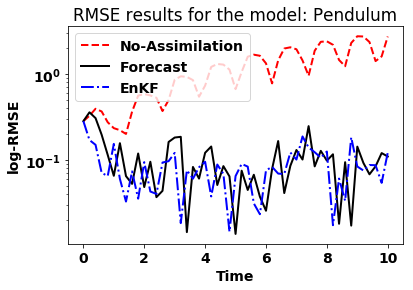

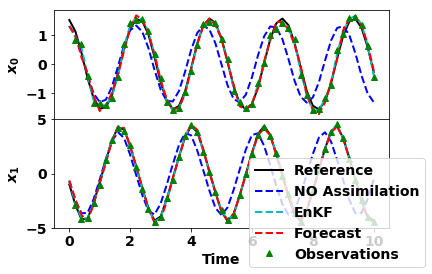

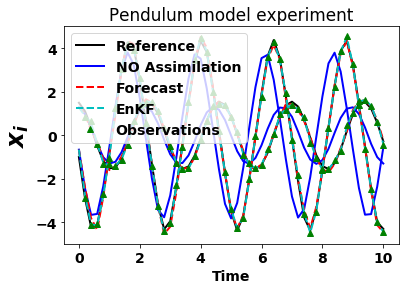

In [10]:
referenceTraject  =  Filter._referenceTrajectory
noAssimTraject    =  Filter._NOassimilationTrajectory
forecastTraject   =  Filter._forecastTrajectory
analysisMeans     =  Filter._analysisMeans
Observations      =  Filter._Observations
Fl_Timespan       =  Filter._Filter_Time_Span
Obs_Timespan      =  Filter._Observation_Time_Span
print 'Plotting Results...\n',divider
outfig = plt.figure(1)
FS = 14
font = {'weight' : 'bold', 'size' : FS}
plt.rc('font', **font)
plt.plot(Fl_Timespan, referenceTraject[0,:] , 'k' , linewidth=2 , label='Reference')
plt.plot(Fl_Timespan, referenceTraject[1,:] , 'k' , linewidth=2)
plt.plot(Fl_Timespan, noAssimTraject[0,:] , 'b' , linewidth=2 , label='NO Assimilation')
plt.plot(Fl_Timespan, noAssimTraject[1,:] , 'b' , linewidth=2)
plt.plot(Fl_Timespan, forecastTraject[0,:] , 'r--' , linewidth=2 , label='Forecast')
plt.plot(Fl_Timespan, forecastTraject[1,:] , 'r--' , linewidth=2)
plt.plot(Fl_Timespan, analysisMeans[0,:] , 'c--' , linewidth=2 , label='EnKF')
plt.plot(Fl_Timespan, analysisMeans[1,:] , 'c--' , linewidth=2)

plt.plot(Obs_Timespan, Observations[0,:] ,'g^' , label='Observations')
plt.plot(Obs_Timespan, Observations[1,:] ,'g^')

plt.xlabel('Time',fontsize=FS , fontweight='bold' )
plt.ylabel('$x_i$',fontsize=FS+10, fontweight='bold' )
plt.title('Pendulum model experiment')
plt.legend()
plt.draw()

plt.show()

In [11]:
# clean up executables for next run.
filelist = [ f for f in os.listdir(".") if f.endswith(".pyc") ]
for fl in filelist:
    os.remove(fl)